In [1]:
import image_registration as ir # github.com/keflavich/image_registration
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
import numpy as np

## Purpose of testing
----------
The purpose of this notebook is to investigate the way the `image_registration` package runs the `cross_correlation_shifts()` function.

Will do the following tests:

1. Making fake data filled with zeros except for one "star" that doesn't move.
1. Making fake data filled with zeros except for one "star" that *does* move.
1. Making fake data with noise and one "star" that doesn't move.
1. Making fake data with noise and one "star" that *does* move.
1. Making fake data with noise, some rows of NaNs in one, and one "star" that doesn't move.
1. Making fake data with noise, some rows of NaNs in one, and one "star" that *does* move.
1. Reading in the `test.fits` cutout of some skylines and running on that.

----------
### 1. Making fake data filled with zeros except for one "star" that doesn't move.

Offsets: -9.035018104045876e-17 -6.122366410532753e-33



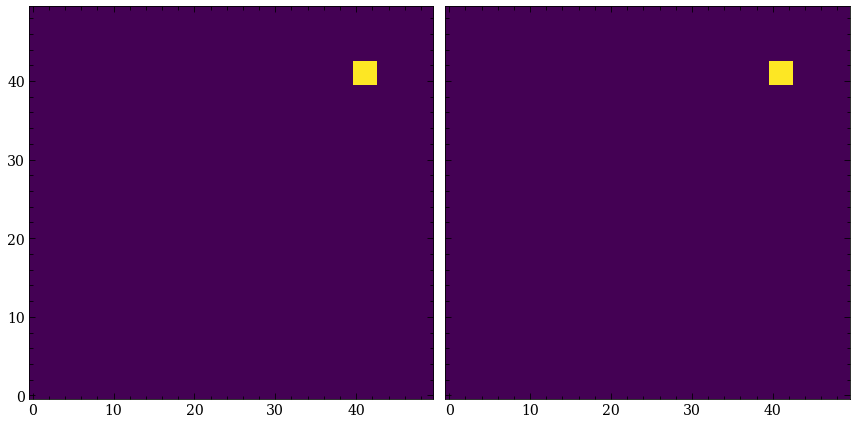

In [2]:
fake = np.zeros((50,50))    # array of zeros
fake[40:43,40:43] = 2       # stationary star

fake1 = np.zeros((50,50))   # array of zeros
fake1[40:43,40:43] = 2      # stationary star

# cross correlation
xshift,yshift = ir.cross_correlation_shifts(fake,fake1)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(fake,origin='lower',aspect='auto',cmap='viridis')

ax = plt.subplot(gs[1])
ax.imshow(fake1,origin='lower',aspect='auto',cmap='viridis')
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, those offsets are tiny &mdash; which is expected.  
#### This test $\color{green}{\textbf{passes}}$.

------------
### 2. Making fake data filled with zeros except for one "star" that does move

Offsets: -10.0 -10.0



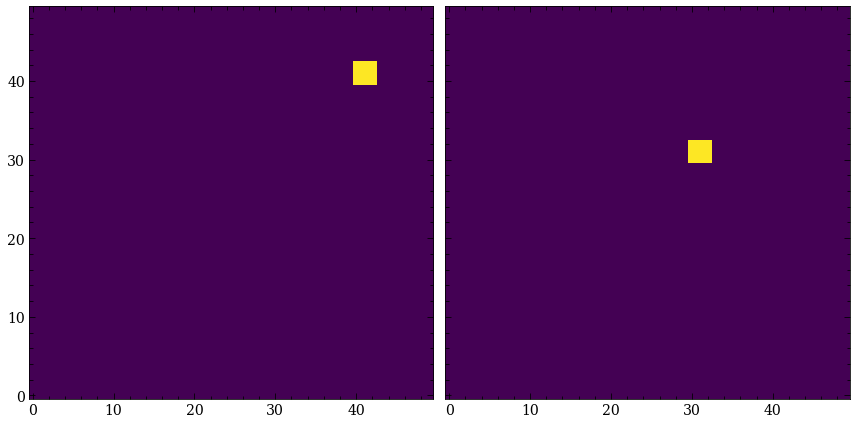

In [3]:
fake = np.zeros((50,50))    # array of zeros
fake[40:43,40:43] = 2       # stationary star

fake1 = np.zeros((50,50))   # array of zeros
fake1[30:33,30:33] = 2      # stationary star

# cross correlation
xshift,yshift = ir.cross_correlation_shifts(fake,fake1)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(fake,origin='lower',aspect='auto',cmap='viridis')

ax = plt.subplot(gs[1])
ax.imshow(fake1,origin='lower',aspect='auto',cmap='viridis')
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, those offsets are (-10,-10) &mdash; which is expected.  
#### This test $\color{green}{\textbf{passes}}$.

--------
### 3. Making fake data with noise and one "star" that doesn't move.

S/N of each "star": 668.2952502161046 1618.5114530014735
Offsets: 0.04105461245942428 -0.008674156002274953



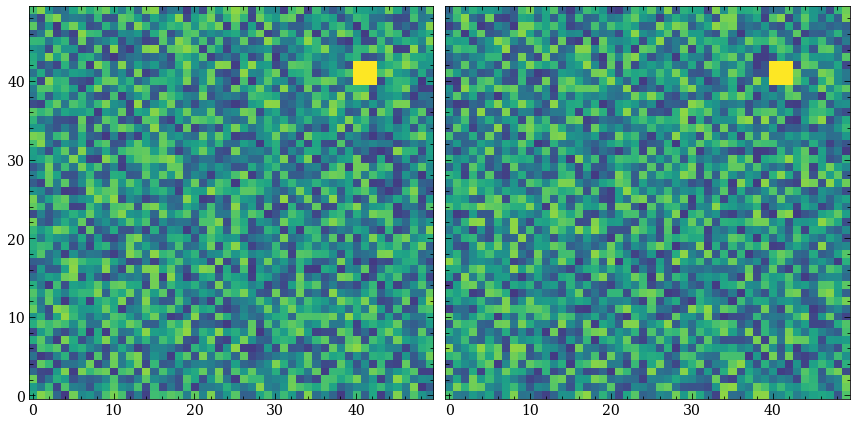

In [5]:
fake = np.zeros((50,50))    # array of zeros
fake[40:43,40:43] = 10      # stationary star, increased value because of added noise

fake1 = np.zeros((50,50))   # array of zeros
fake1[40:43,40:43] = 10     # stationary star, increased value because of added noise

fake += np.random.uniform(-1,1,(50,50))   # random noise betwee [-1,1]
fake1 += np.random.uniform(-1,1,(50,50))  # random noise betwee [-1,1]
print('S/N of each "star":',np.max(fake)/abs(np.median(fake)),
      np.max(fake1)/abs(np.median(fake1)))

# cross correlation
xshift,yshift = ir.cross_correlation_shifts(fake,fake1)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(fake,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))

ax = plt.subplot(gs[1])
ax.imshow(fake1,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, so these offsets are in the few % level... for now that's okay.
#### This test $\color{green}{\textbf{passes}}$ (for now).

---------
### 4. Making fake data with noise and one "star" that does move.

S/N of each "star": 375.27541870983436 228.6966144474188
Offsets: -10.032635196046776 -10.033948098148562



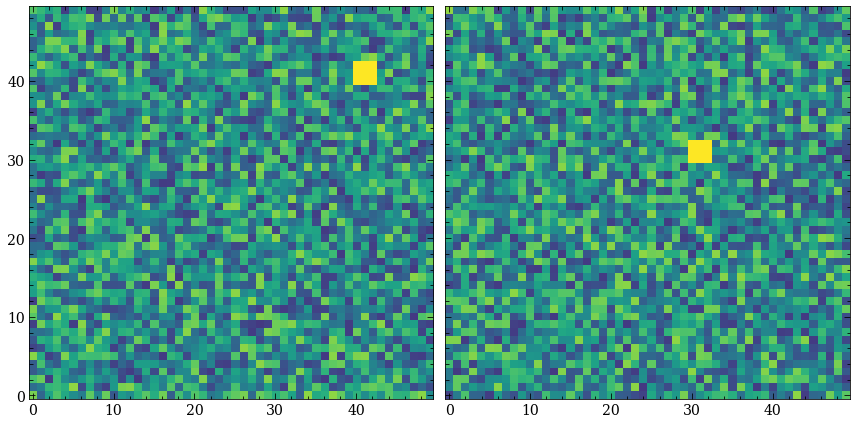

In [6]:
fake = np.zeros((50,50))    # array of zeros
fake[40:43,40:43] = 10      # stationary star, increased value because of added noise

fake1 = np.zeros((50,50))   # array of zeros
fake1[30:33,30:33] = 10     # stationary star, increased value because of added noise

fake += np.random.uniform(-1,1,(50,50))   # random noise betwee [-1,1]
fake1 += np.random.uniform(-1,1,(50,50))  # random noise betwee [-1,1]
print('S/N of each "star":',np.max(fake)/abs(np.median(fake)),
      np.max(fake1)/abs(np.median(fake1)))

# cross correlation
xshift,yshift = ir.cross_correlation_shifts(fake,fake1)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(fake,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))

ax = plt.subplot(gs[1])
ax.imshow(fake1,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, so these offsets are technically (-10,10) with variation in the few % level... for now that's okay.
#### This test $\color{green}{\textbf{passes}}$ (for now).

-------
### 5. Making fake data with noise, some rows of NaNs in one, and one "star" that doesn't move.

S/N of each "star": 892.5944024563635 8121.599440621317
Offsets: 0.016748496381319027 0.01679569914100311



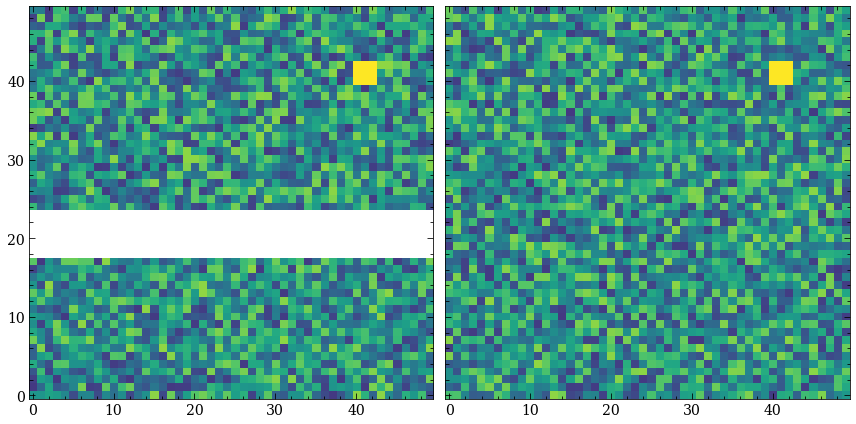

In [11]:
fake = np.zeros((50,50))     # array of zeros
fake[40:43,40:43] = 10       # stationary star, increased value because of added noise
fake[18:24] = np.nan         # rows of NaNs

fake1 = np.zeros((50,50))    # array of zeros
fake1[40:43,40:43] = 10      # stationary star, increased value because of added noise

fake += np.random.uniform(-1,1,(50,50))   # random noise betwee [-1,1]
fake1 += np.random.uniform(-1,1,(50,50))  # random noise betwee [-1,1]
print('S/N of each "star":',np.nanmax(fake)/abs(np.nanmedian(fake)),
      np.nanmax(fake1)/abs(np.nanmedian(fake1)))

# cross correlation
xshift,yshift = ir.cross_correlation_shifts(fake,fake1)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(fake,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))

ax = plt.subplot(gs[1])
ax.imshow(fake1,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, so these offsets are still in the few % level... for now that's okay.
#### This test $\color{green}{\textbf{passes}}$ (for now).

------
### 6. Making fake data with noise, some rows of NaNs in one, and one "star" that does move.

S/N of each "star": 3789.5975619255896 533.413078485849
Offsets: -10.012274361978717 -9.978344187729778



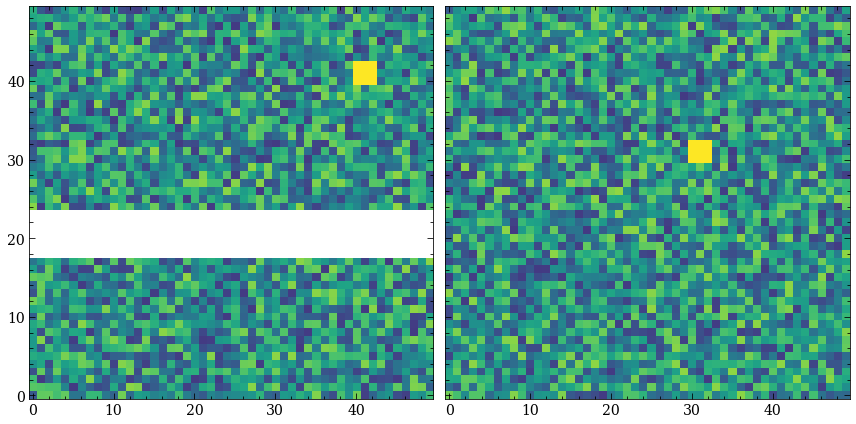

In [14]:
fake = np.zeros((50,50))     # array of zeros
fake[40:43,40:43] = 10       # stationary star, increased value because of added noise
fake[18:24] = np.nan         # rows of NaNs

fake1 = np.zeros((50,50))    # array of zeros
fake1[30:33,30:33] = 10      # stationary star, increased value because of added noise

fake += np.random.uniform(-1,1,(50,50))   # random noise betwee [-1,1]
fake1 += np.random.uniform(-1,1,(50,50))  # random noise betwee [-1,1]
print('S/N of each "star":',np.nanmax(fake)/abs(np.nanmedian(fake)),
      np.nanmax(fake1)/abs(np.nanmedian(fake1)))

# cross correlation
xshift,yshift = ir.cross_correlation_shifts(fake,fake1)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(fake,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))

ax = plt.subplot(gs[1])
ax.imshow(fake1,origin='lower',aspect='auto',cmap='viridis',clim=(-1.5,1.5))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, so these offsets are still technically (-10,10) with variation in the few % level... for now that's okay.
#### This test $\color{green}{\textbf{passes}}$ (for now).

-------------
### 7. Now working with **real data**
Taking a cutout from some real MOSFIRE raw data

In [17]:
real = fits.getdata('test.fits')

Offsets: 0.5 0.5



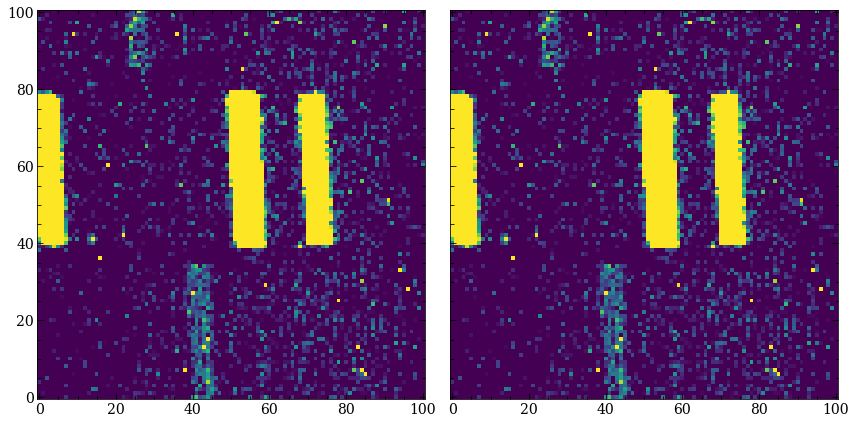

In [20]:
# cross correlation against itself
xshift,yshift = ir.cross_correlation_shifts(real,real)
print('Offsets:',round(xshift,2),round(yshift,2),end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(real,origin='lower',aspect='auto',cmap='viridis',clim=(-20,20))

ax = plt.subplot(gs[1])
ax.imshow(real,origin='lower',aspect='auto',cmap='viridis',clim=(-20,20))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, so this is concerning &mdash; this should return (0,0) like the fake data.
#### This test $\color{red}{\textbf{fails}}$.

Trying something else &mdash; going to read in and cut out a new piece of MOSFIRE data (will need to change the path if you're running this code).

In [37]:
full_real2 = fits.getdata('/path/to/data/date/m[date]_0200.fits')
fullsize = full_real2.shape; halfsize = [round(fullsize[0]/2),round(fullsize[1]/2)]

cut = 100
real2 = full_real2[halfsize[0]-cut:halfsize[0]+cut,halfsize[1]-cut:halfsize[1]+cut]

Offsets: -4.948915551981499e-19 -3.825985427403004e-17



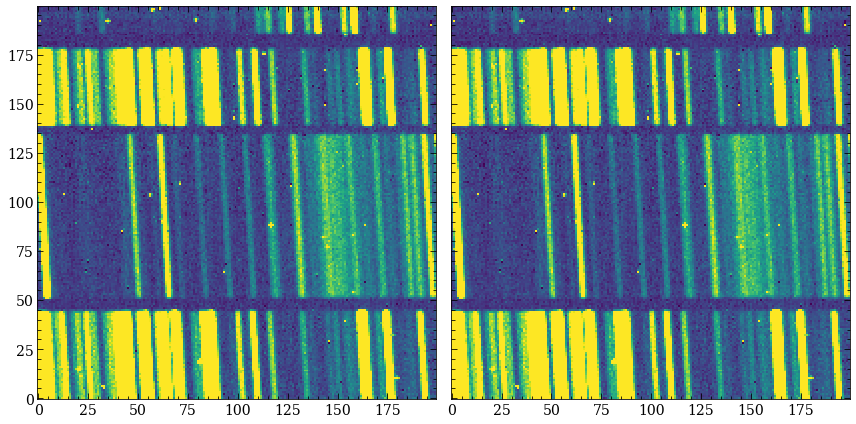

In [39]:
# cross correlation against itself
xshift,yshift = ir.cross_correlation_shifts(real2,real2)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(real2,origin='lower',aspect='auto',cmap='viridis',clim=(-20,200))

ax = plt.subplot(gs[1])
ax.imshow(real2,origin='lower',aspect='auto',cmap='viridis',clim=(-20,200))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

GREAT! I think the issue was more lines &mdash; will be replacing the previous `test.fits` image with one that shows more skylines in different slits.
#### This test $\color{green}{\textbf{passes}}$!

-----------
### One last test: adding rows of NaNs in different locations for each image.
Making a point to mask out around some slit edges.

Offsets: 4.9147277702573806e-06 0.0004570305332242895



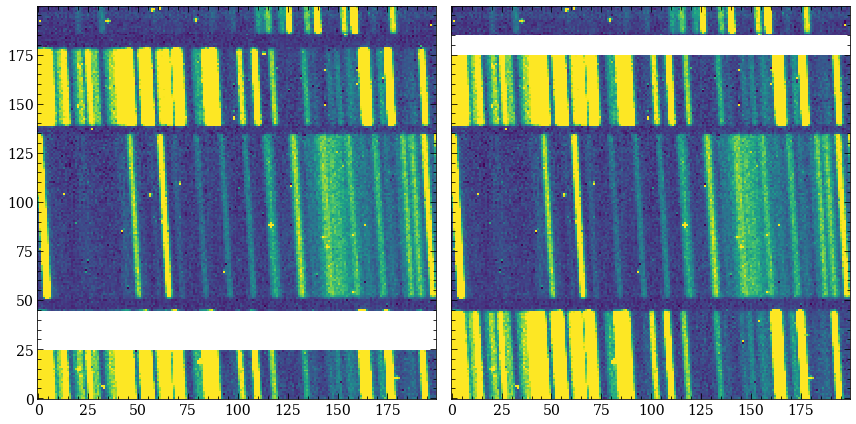

In [44]:
real3 = real2.copy()
real4 = real2.copy()

real3[25:45] = np.nan  # also making them different number of rows
real4[175:185] = np.nan  # also making them different number of rows

# cross correlation against itself
xshift,yshift = ir.cross_correlation_shifts(real3,real4)
print('Offsets:',xshift,yshift,end='\n\n')

plt.figure(figsize=(12,6))
gs = gd.GridSpec(1,2,width_ratios=[1,1])

ax = plt.subplot(gs[0])
ax.imshow(real3,origin='lower',aspect='auto',cmap='viridis',clim=(-20,200))

ax = plt.subplot(gs[1])
ax.imshow(real4,origin='lower',aspect='auto',cmap='viridis',clim=(-20,200))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()
plt.close('all')

Okay, so the offsets are less than a %, so I'm okay with that.
## This test $\color{green}{\textbf{passes}}$.